<a href="https://colab.research.google.com/github/MargaritaGorbunova/Artificial_Intelligence_Methods_Coursework/blob/main/Lab_01_Concrete_Strength/concrete_strength_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт бибилиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

print("Libraries imported successfully!")

Libraries imported successfully!


Загрузка данных

In [ ]:
# Загрузка файла в Google Colab
from google.colab import files
import io

print("Please upload 'concrete_data.csv' file")
uploaded = files.upload()

# Чтение данных
for filename in uploaded.keys():
    print(f"Uploaded: {filename}")
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("\n" + "="*50)
print("DATASET INFORMATION")
print("="*50)

Please upload 'concrete_data.csv' file


Saving concrete_data (1).csv to concrete_data (1).csv
Uploaded: concrete_data (1).csv

DATASET INFORMATION


Анализ данных

In [ ]:
# Основная информация о данных
print("First 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nStatistical summary:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

# ПРАВИЛЬНОЕ разделение на признаки и целевую переменную
X = df.drop("concrete_compressive_strength", axis=1)  # ИЗМЕНИЛИ ЗДЕСЬ
y = df["concrete_compressive_strength"]  # ИЗМЕНИЛИ ЗДЕСЬ

print(f"\nFeatures: {list(X.columns)}")
print(f"Target: concrete_compressive_strength")

First 5 rows:
   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column 

Визуализация

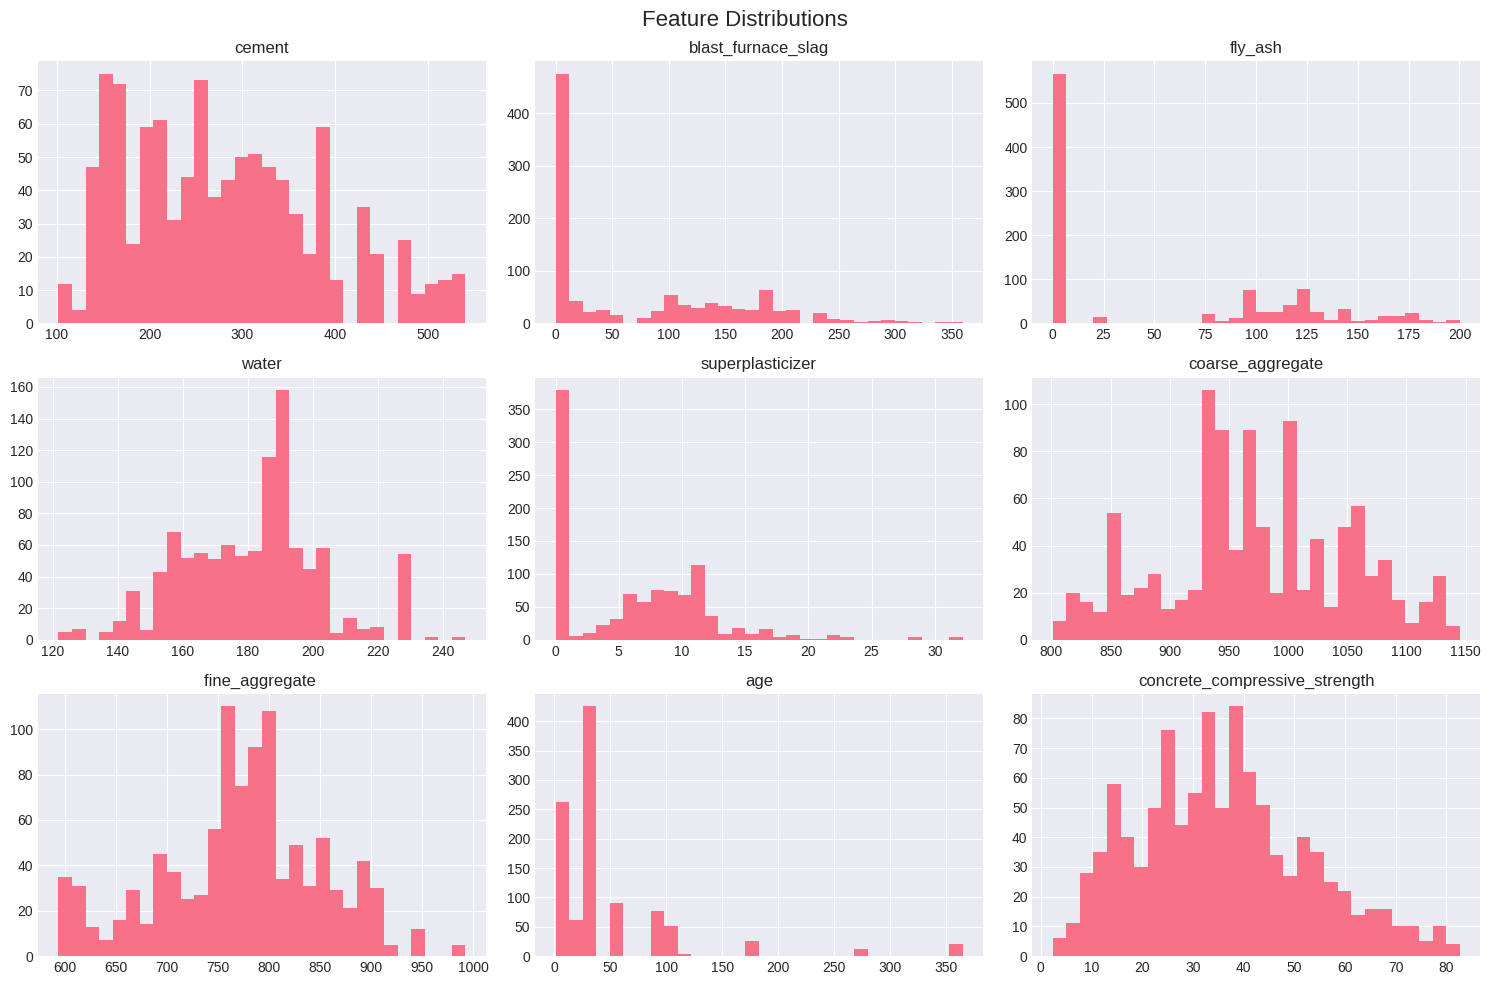

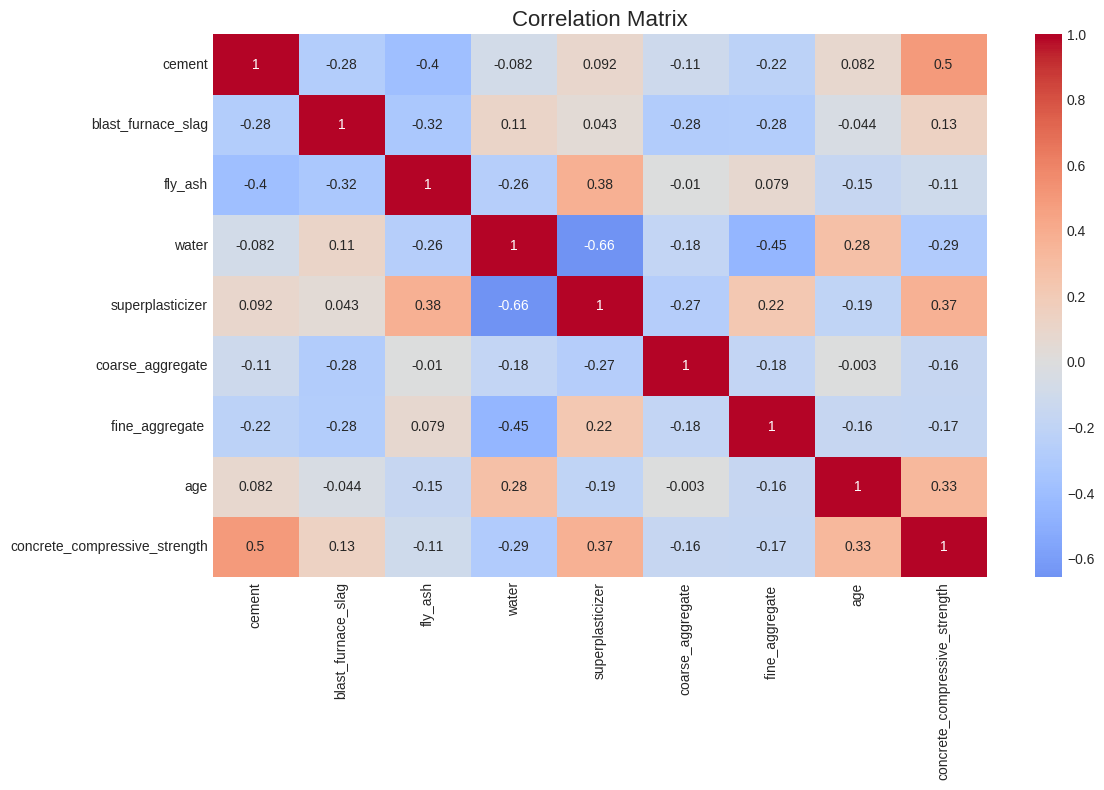

In [ ]:
# Гистограммы распределения
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Корреляционная матрица
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

Предобработка данных

In [ ]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Data preprocessing completed!")
print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Data preprocessing completed!
Train set: 824 samples
Test set: 206 samples


Однослойный перцептрон

In [ ]:
class SinglePerceptron:
    def __init__(self, learning_rate=0.01, epochs=30, tol=1e-4):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tol = tol
        self.weights = None
        self.bias = None

    def initialize_weights(self, count):
        self.weights = np.random.randn(count)
        self.bias = np.random.randn()

    def predict(self, x):
        return np.dot(x, self.weights) + self.bias

    def train(self, x_train, y_train, x_test, y_test):
        self.initialize_weights(x_train.shape[1])
        train_errors = []
        test_errors = []
        prev_train_error = float('inf')

        for epoch in range(self.epochs):
            # Обучение на каждом примере
            for i in range(x_train.shape[0]):
                xi = x_train[i]
                yi = y_train.iloc[i]
                y_pred = self.predict(xi)
                error = yi - y_pred

                # Обновление весов
                self.weights += self.learning_rate * error * xi
                self.bias += self.learning_rate * error

            # Расчет ошибок после эпохи
            train_pred = self.predict(x_train)
            test_pred = self.predict(x_test)

            train_mse = np.mean((y_train - train_pred) ** 2)
            test_mse = np.mean((y_test - test_pred) ** 2)

            train_errors.append(train_mse)
            test_errors.append(test_mse)

            # Ранняя остановка
            if abs(prev_train_error - train_mse) < self.tol:
                print(f"Early stopping at epoch {epoch+1}")
                break
            prev_train_error = train_mse

        return train_errors, test_errors

    def evaluate(self, x_train, y_train, x_test, y_test):
        train_pred = self.predict(x_train)
        test_pred = self.predict(x_test)

        train_mse = mean_squared_error(y_train, train_pred)
        test_mse = mean_squared_error(y_test, test_pred)

        print("="*50)
        print("SINGLE-LAYER PERCEPTRON RESULTS")
        print("="*50)
        print(f"Train MSE: {train_mse:.2f}")
        print(f"Test MSE: {test_mse:.2f}")

        return train_mse, test_mse

print("SinglePerceptron class defined!")

SinglePerceptron class defined!


Обучение однослойного перцептрона

Training Single-Layer Perceptron...
Early stopping at epoch 27
SINGLE-LAYER PERCEPTRON RESULTS
Train MSE: 113.23
Test MSE: 100.15


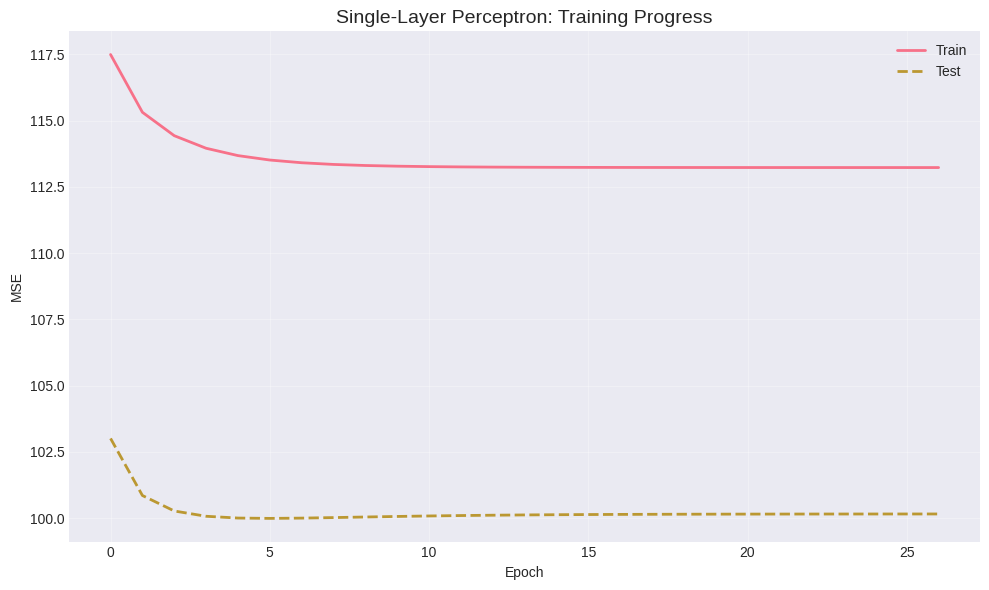

In [ ]:
# Создание и обучение модели
perceptron = SinglePerceptron(learning_rate=0.01, epochs=30, tol=1e-4)

print("Training Single-Layer Perceptron...")
train_errors, test_errors = perceptron.train(X_train, y_train, X_test, y_test)
train_mse_slp, test_mse_slp = perceptron.evaluate(X_train, y_train, X_test, y_test)

# Визуализация обучения
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train', linewidth=2)
plt.plot(test_errors, label='Test', linewidth=2, linestyle='--')
plt.title("Single-Layer Perceptron: Training Progress", fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

 Многослойный перцептрон

In [ ]:
class MultiPerceptron:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.errors_train = []
        self.errors_test = []

        # Инициализация весов
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros(hidden_size)
        self.bias_output = np.zeros(output_size)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def forward(self, x):
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.relu(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        return self.final_input

    def backward(self, x, y, output, learning_rate):
        error = y - output
        d_output = -error

        d_hidden = d_output.dot(self.weights_hidden_output.T)
        d_hidden *= self.relu_derivative(self.hidden_input)

        # Градиенты
        grad_w_ho = self.hidden_output.T.dot(d_output)
        grad_b_ho = np.sum(d_output, axis=0)

        grad_w_ih = x.T.dot(d_hidden)
        grad_b_ih = np.sum(d_hidden, axis=0)

        # Обновление весов
        self.weights_hidden_output -= learning_rate * grad_w_ho
        self.bias_output -= learning_rate * grad_b_ho
        self.weights_input_hidden -= learning_rate * grad_w_ih
        self.bias_hidden -= learning_rate * grad_b_ih

    def train(self, x_train, y_train, x_test, y_test, epochs, learning_rate):
        # Преобразование y в 2D
        y_train = y_train.reshape(-1, 1)
        y_test = y_test.reshape(-1, 1)

        for epoch in range(epochs):
            # Прямое распространение
            output_train = self.forward(x_train)

            # Обратное распространение
            self.backward(x_train, y_train, output_train, learning_rate)

            # Расчет ошибок
            output_test = self.forward(x_test)

            mse_train = np.mean((y_train - output_train) ** 2)
            mse_test = np.mean((y_test - output_test) ** 2)

            self.errors_train.append(mse_train)
            self.errors_test.append(mse_test)

            # Прогресс
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{epochs} - Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}")

    def predict(self, x):
        return self.forward(x)

    def plot_errors(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.errors_train, label='Train', linewidth=2)
        plt.plot(self.errors_test, label='Test', linewidth=2, linestyle='--')
        plt.title("Multi-Layer Perceptron: Training Progress", fontsize=14)
        plt.xlabel("Epoch")
        plt.ylabel("MSE")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

print("MultiPerceptron class defined!")

MultiPerceptron class defined!


Обучение многослойного перцептрона

Training Multi-Layer Perceptron...
Epoch 10/100 - Train MSE: 296.80, Test MSE: 207.33
Epoch 20/100 - Train MSE: 170.19, Test MSE: 153.12
Epoch 30/100 - Train MSE: 152.71, Test MSE: 138.01
Epoch 40/100 - Train MSE: 142.03, Test MSE: 127.47
Epoch 50/100 - Train MSE: 134.15, Test MSE: 119.11
Epoch 60/100 - Train MSE: 127.80, Test MSE: 112.73
Epoch 70/100 - Train MSE: 122.57, Test MSE: 107.56
Epoch 80/100 - Train MSE: 118.00, Test MSE: 102.98
Epoch 90/100 - Train MSE: 113.94, Test MSE: 99.20
Epoch 100/100 - Train MSE: 110.35, Test MSE: 95.93


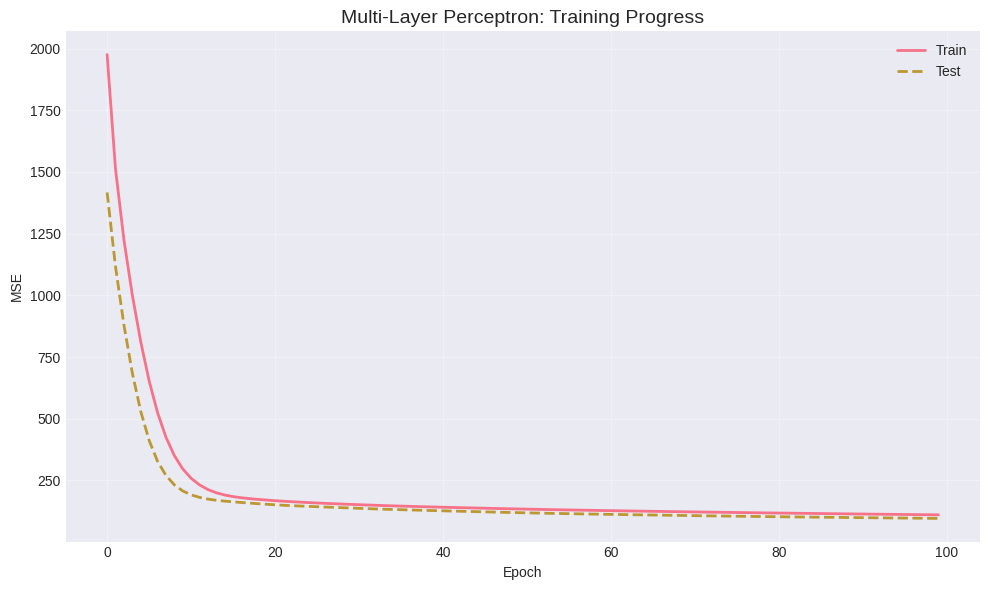

MULTI-LAYER PERCEPTRON RESULTS
Train MSE: 110.01
Test MSE: 95.93


In [ ]:
# Создание и обучение MLP
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1

mlp = MultiPerceptron(input_size, hidden_size, output_size)

print("Training Multi-Layer Perceptron...")
mlp.train(X_train, y_train.values.reshape(-1, 1),
          X_test, y_test.values.reshape(-1, 1),
          epochs=100, learning_rate=0.00001)

# Визуализация
mlp.plot_errors()

# Оценка модели
train_mlp_pred = mlp.predict(X_train)
test_mlp_pred = mlp.predict(X_test)

train_mse_mlp = np.mean((y_train.values.reshape(-1, 1) - train_mlp_pred) ** 2)
test_mse_mlp = np.mean((y_test.values.reshape(-1, 1) - test_mlp_pred) ** 2)

print("="*50)
print("MULTI-LAYER PERCEPTRON RESULTS")
print("="*50)
print(f"Train MSE: {train_mse_mlp:.2f}")
print(f"Test MSE: {test_mse_mlp:.2f}")

Сравнение моделей

MODEL COMPARISON
Model                     Train MSE       Test MSE        Improvement    
----------------------------------------------------------------------
Single-Layer              113.23          100.15          0%             
Multi-Layer               110.01          95.93           4.2            %

Training epochs:
Single-Layer: 27 epochs (early stopping)
Multi-Layer: 100 epochs


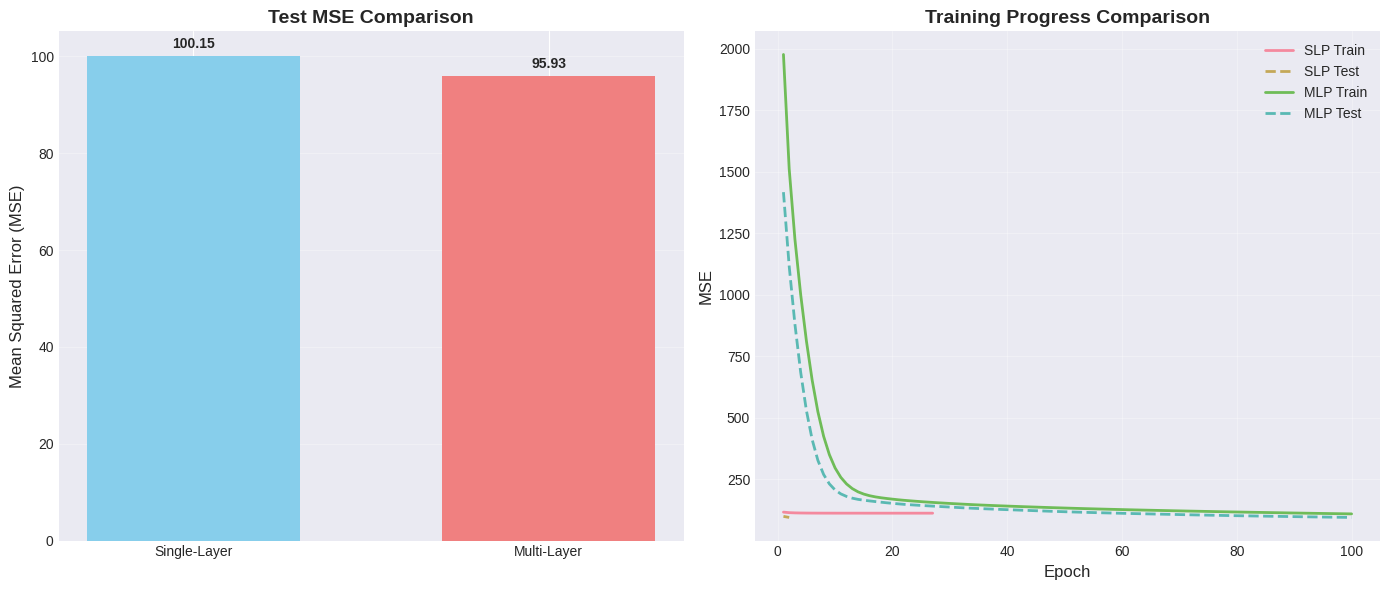


Results Summary:
Single-Layer Perceptron: Test MSE = 100.15
Multi-Layer Perceptron: Test MSE = 95.93
Improvement: 4.2% reduction in MSE

The multi-layer perceptron achieved better performance with 4.2% lower error!


In [ ]:
print("="*50)
print("MODEL COMPARISON")
print("="*50)
print(f"{'Model':<25} {'Train MSE':<15} {'Test MSE':<15} {'Improvement':<15}")
print("-"*70)
print(f"{'Single-Layer':<25} {train_mse_slp:<15.2f} {test_mse_slp:<15.2f} {'0%':<15}")

improvement = (test_mse_slp - test_mse_mlp) / test_mse_slp * 100
print(f"{'Multi-Layer':<25} {train_mse_mlp:<15.2f} {test_mse_mlp:<15.2f} {improvement:<15.1f}%")

print(f"\nTraining epochs:")
print(f"Single-Layer: {len(train_errors)} epochs (early stopping)")
print(f"Multi-Layer: {len(mlp.errors_train)} epochs")

# Визуальное сравнение
plt.figure(figsize=(14, 6))

# График 1: Сравнение MSE
plt.subplot(1, 2, 1)
models = ['Single-Layer', 'Multi-Layer']
test_errors_vals = [test_mse_slp, test_mse_mlp]
bars = plt.bar(models, test_errors_vals, color=['skyblue', 'lightcoral'], width=0.6)
plt.title('Test MSE Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Добавление значений на столбцы
for bar, error in zip(bars, test_errors_vals):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{error:.2f}', ha='center', va='bottom', fontweight='bold')

# График 2: Прогресс обучения (с правильными размерами)
plt.subplot(1, 2, 2)

# Для однослойного перцептрона
if len(train_errors) == len(test_errors):
    epochs_slp = range(1, len(train_errors) + 1)
    plt.plot(epochs_slp, train_errors, label='SLP Train', alpha=0.8, linewidth=2)
    plt.plot(epochs_slp, test_errors, label='SLP Test', alpha=0.8, linewidth=2, linestyle='--')
else:
    # Если длины разные, строим отдельно
    if len(train_errors) > 0:
        epochs_train = range(1, len(train_errors) + 1)
        plt.plot(epochs_train, train_errors, label='SLP Train', alpha=0.8, linewidth=2)

    if len(test_errors) > 0:
        epochs_test = range(1, len(test_errors) + 1)
        plt.plot(epochs_test, test_errors, label='SLP Test', alpha=0.8, linewidth=2, linestyle='--')

# Для многослойного перцептрона
epochs_mlp = range(1, len(mlp.errors_train) + 1)
plt.plot(epochs_mlp, mlp.errors_train, label='MLP Train', alpha=0.8, linewidth=2)
plt.plot(epochs_mlp, mlp.errors_test, label='MLP Test', alpha=0.8, linewidth=2, linestyle='--')

plt.title('Training Progress Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nResults Summary:")
print(f"Single-Layer Perceptron: Test MSE = {test_mse_slp:.2f}")
print(f"Multi-Layer Perceptron: Test MSE = {test_mse_mlp:.2f}")
print(f"Improvement: {improvement:.1f}% reduction in MSE")
print(f"\nThe multi-layer perceptron achieved better performance with {improvement:.1f}% lower error!")